# Постановка задачи

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
import math

# Задание А

## Аналитическое решение

In [2]:
# ODE
t = sp.symbols('t')
y = sp.Function('y')
equation = sp.Eq(y(t).diff(t), 2*t*(t**2 + y(t)))
sp.dsolve(equation)

Eq(y(t), C1*exp(t**2) - t**2 - 1)

In [3]:
# Определение константы и задание функции
C1 = sp.symbols('C1')

def u_(x):
    return (C1*math.exp(x**2) - x**2 - 1)
    
C1 = sp.solve(u_(0),C1)[0]

In [4]:
# Или можно сразу решить задачу Коши:
t = sp.symbols('t')
y = sp.Function('y')
equation = sp.Eq(y(t).diff(t), 2*t*(t**2 + y(t)))
sp.dsolve(equation, ics={y(0): 0})

Eq(y(t), -t**2 + exp(t**2) - 1)

## Численные решения

In [5]:
def f(x,u):
    return 2*x*(x**2 + u)

In [6]:
a = 0
b = 2
N_ = 30, 50, 100, 500, 1000

### Метод Эйлера

N =  30 : Error =  17.05502
N =  50 : Error =  11.51404
N =  100 : Error =  6.34179
N =  500 : Error =  1.37859
N =  1000 : Error =  0.6968


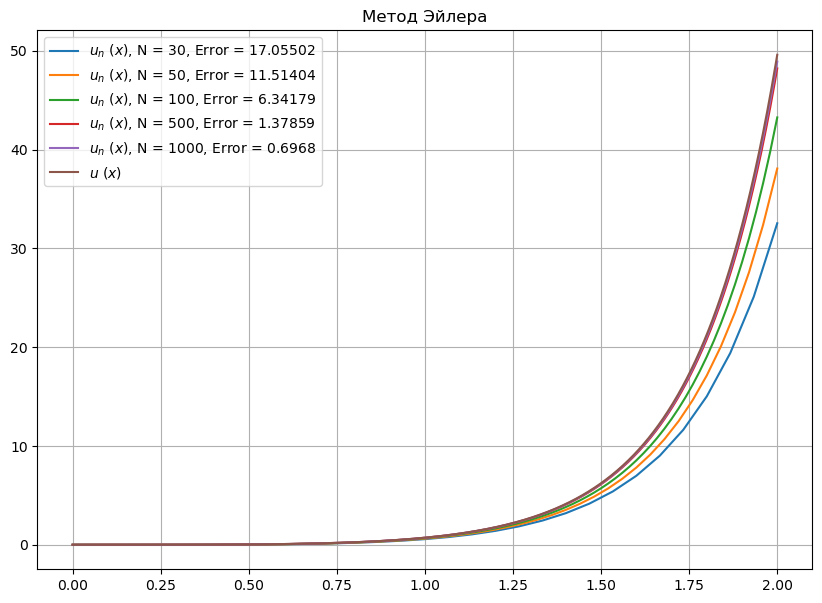

In [7]:
plt.figure(figsize = (10,7))

for N in N_:
    h = (b-a)/N
    x = np.zeros(N+1)
    
    for i in range(0,N+1):
        x[i] = h*i
        
    u = np.zeros(N+1)
    u_real = np.zeros(N+1)
    E = np.zeros(N+1)
    u[0]=0
    
    for n in range(0,N):
        u[n+1] = u[n] + h * f(x[n],u[n])
        u_real[n+1] = u_(x[n+1])
        E[n+1] = abs(u_real[n+1] - u[n+1])
    print('N = ', str(N), ': Error = ', str(round(max(E),5)))
    plt.plot(x,u,label='$u_n$ $(x)$'+', N = '+str(N)+', Error = '+str(round(max(E),5)))
    
plt.plot(x,u_real,label='$u$ $(x)$')
plt.title('Метод Эйлера')
plt.legend()
plt.grid()
plt.savefig('1')

### Модифицированный метод Эйлера

N =  30 : Error =  0.99036
N =  50 : Error =  0.38241
N =  100 : Error =  0.10063
N =  500 : Error =  0.00419
N =  1000 : Error =  0.00105


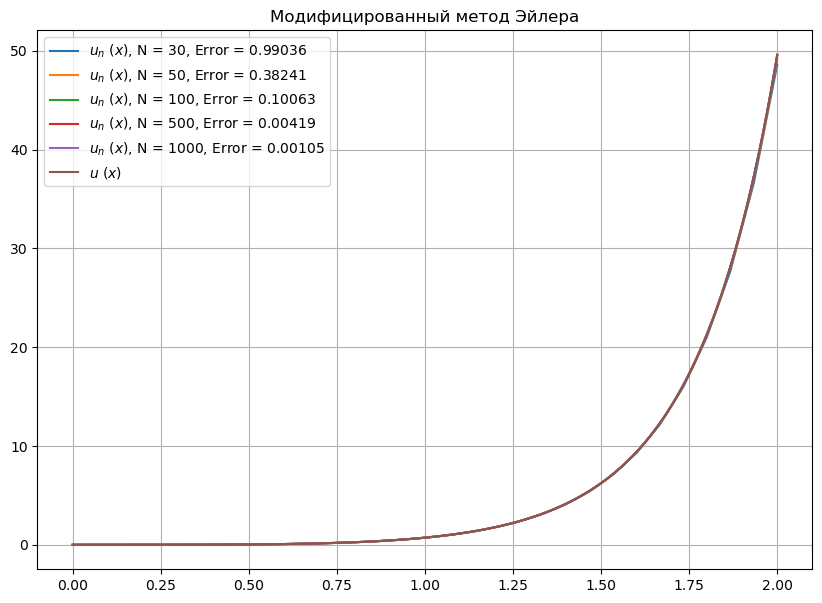

In [8]:
plt.figure(figsize = (10,7))

for N in N_:
    h = (b-a)/N
    x = np.zeros(N+1)
    
    for i in range(0,N+1):
        x[i] = h*i
        
    u = np.zeros(N+1)
    u_real = np.zeros(N+1)
    E = np.zeros(N+1)
    u[0]=0
    
    for n in range(0,N):
        u_buf = u[n] + h * f(x[n],u[n])
        u[n+1] = u[n] + 0.5 * h * ( f(x[n],u[n]) + f(x[n+1],u_buf) )
        u_real[n+1] = u_(x[n+1])
        E[n+1] = abs(u_real[n+1] - u[n+1])
    print('N = ', str(N), ': Error = ', str(round(max(E),5)))
    plt.plot(x,u,label='$u_n$ $(x)$'+', N = '+str(N)+', Error = '+str(round(max(E),5)))
    
plt.plot(x,u_real,label='$u$ $(x)$')
plt.title('Модифицированный метод Эйлера')
plt.legend()
plt.grid()
plt.savefig('2')

### Усовершенствованный метод Эйлера

N =  30 : Error =  1.43661
N =  50 : Error =  0.55706
N =  100 : Error =  0.14698
N =  500 : Error =  0.00613
N =  1000 : Error =  0.00154


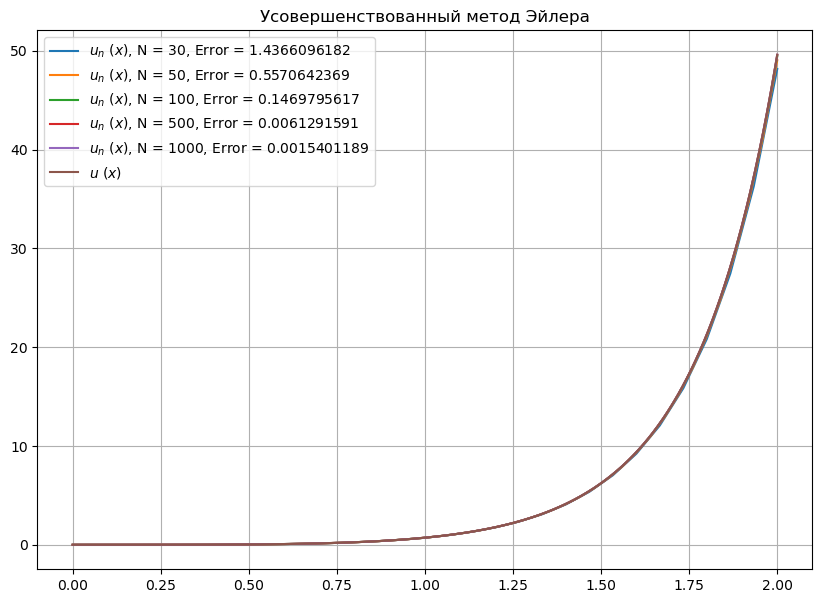

In [9]:
plt.figure(figsize = (10,7))

for N in N_:
    h = (b-a)/N
    x = np.zeros(N+1)
    
    for i in range(0,N+1):
        x[i] = h*i
        
    u = np.zeros(N+1)
    u_real = np.zeros(N+1)
    E = np.zeros(N+1)
    u[0]=0
    
    for n in range(0,N):
        u_buf = u[n] + 0.5 * h * f(x[n],u[n])
        u[n+1] = u[n] +  h * f(x[n]+0.5*h,u_buf)
        u_real[n+1] = u_(x[n+1])
        E[n+1] = abs(u_real[n+1] - u[n+1])
    print('N = ', str(N), ': Error = ', str(round(max(E),5)))
    plt.plot(x,u,label='$u_n$ $(x)$'+', N = '+str(N)+', Error = '+str(round(max(E),10)))
    
plt.plot(x,u_real,label='$u$ $(x)$')
plt.legend()
plt.title('Усовершенствованный метод Эйлера')
plt.grid()

### Метод Рунге-Кутта

N =  30 : Error =  0.0025249781
N =  50 : Error =  0.0003520514
N =  100 : Error =  2.32404e-05
N =  500 : Error =  3.88e-08
N =  1000 : Error =  2.4e-09


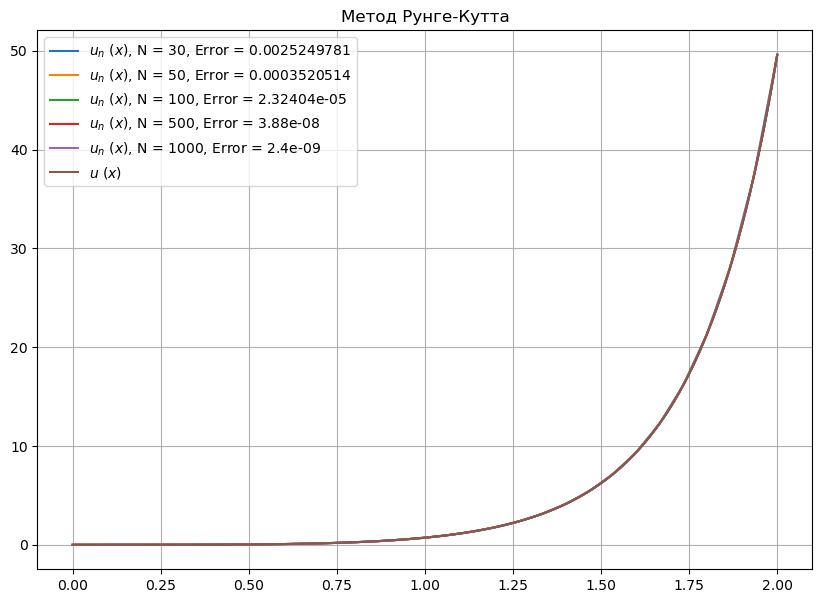

In [10]:
plt.figure(figsize = (10,7))

for N in N_:
    h = (b-a)/N
    x = np.zeros(N+1)
    
    for i in range(0,N+1):
        x[i] = h*i
        
    u = np.zeros(N+1)
    u_real = np.zeros(N+1)
    E = np.zeros(N+1)
    u[0]=0
    u_ln = np.empty(N+1)
    for n in range(0,N):
        
        k0 = f(x[n],u[n])
        k1 = f(x[n] + 0.5*h , u[n] + 0.5*h*k0)
        k2 = f(x[n] + 0.5*h , u[n] + 0.5*h*k1)
        k3 = f(x[n]+h , u[n] + h*k2)

        u[n+1] = u[n] +  h/6 * (k0 + 2*k1 + 2*k2 + k3)
        u_real[n+1] = u_(x[n+1])
        E[n+1] = abs(u_real[n+1] - u[n+1])
    print('N = ', str(N), ': Error = ', str(round(max(E),10)))
    plt.plot(x,u,label='$u_n$ $(x)$'+', N = '+str(N)+', Error = '+str(round(max(E),10)))
    
plt.plot(x,u_real,label='$u$ $(x)$')
plt.legend()
plt.title('Метод Рунге-Кутта')
plt.grid()

# Задание Б

## Аналитическое решение

In [11]:
t = sp.symbols('t')
y = sp.Function('y')

equation = sp.Eq(y(t).diff(t,t), 2*y(t).diff(t))
sp.dsolve(equation, ics={y(0): 2, y(t).diff(t).subs(t, 0): 2})

Eq(y(t), exp(2*t) + 1)

In [12]:
def u_(x):
    return math.exp(2*x) + 1

## Численные решения

In [ ]:
# Необходимо свести уравнение к системе уравнений первого порядка

In [13]:
def f(v): # v' = 2v
    return 2*v

In [14]:
def g(v): # x' = v
    return v

In [15]:
a = 0
b = 2
N_ = 30, 50, 100, 500, 1000

### Метод Эйлера

N =  30 : Error =  11.86845
N =  50 : Error =  7.69654
N =  100 : Error =  4.0932
N =  500 : Error =  0.86206
N =  1000 : Error =  0.43389


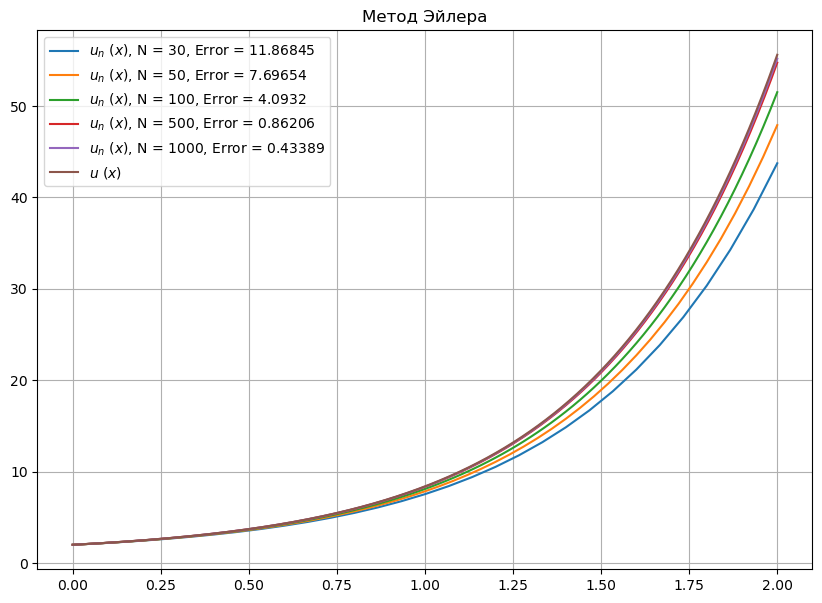

In [16]:
plt.figure(figsize = (10,7))

for N in N_:
    h = (b-a)/N
    x = np.zeros(N+1)
    
    for i in range(0,N+1):
        x[i] = h*i
    
    v = np.zeros(N+1)
    u = np.zeros(N+1)
    u_real = np.zeros(N+1)
    E = np.zeros(N+1)
    u[0] = 2
    v[0] = 2
    u_real[0] = u_(0)
    
    for n in range(0,N):
        v[n+1] = v[n] +  h * f(v[n])
        u[n+1] = u[n] + h * v[n]
        u_real[n+1] = u_(x[n+1])
        E[n+1] = abs(u_real[n+1] - u[n+1])
    print('N = ', str(N), ': Error = ', str(round(max(E),5)))
    plt.plot(x,u,label='$u_n$ $(x)$'+', N = '+str(N)+', Error = '+str(round(max(E),5)))
    
plt.plot(x,u_real,label='$u$ $(x)$')
plt.legend()
plt.title('Метод Эйлера')
plt.grid()
plt.savefig('3')

### Метод Рунге-Кутта

N =  30 : Error =  0.0005147921
N =  50 : Error =  6.97415e-05
N =  100 : Error =  4.5064e-06
N =  500 : Error =  7.4e-09
N =  1000 : Error =  5e-10


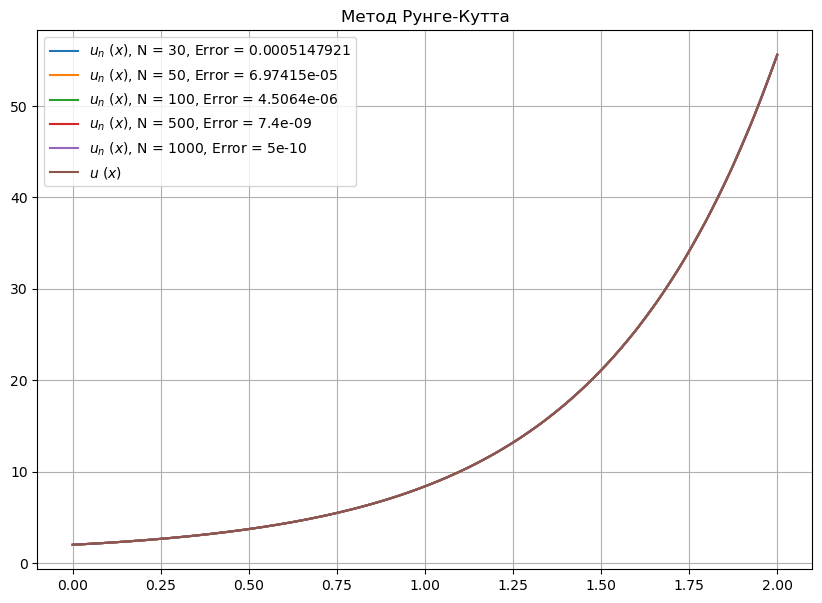

In [17]:
plt.figure(figsize = (10,7))

for N in N_:
    h = (b-a)/N
    x = np.zeros(N+1)
    
    for i in range(0,N+1):
        x[i] = h*i
    
    v = np.zeros(N+1)
    u = np.zeros(N+1)
    u_real = np.zeros(N+1)
    E = np.zeros(N+1)
    u[0] = 2
    v[0] = 2
    u_real[0] = u_(0)
    
    for n in range(0,N):
        
        k0 = f(v[n])
        l0 = g(v[n])
        k1 = f(v[n] + 0.5*h*k0)
        l1 = g(v[n] + 0.5*h*k0)
        k2 = f(v[n] + 0.5*h*k1)
        l2 = g(v[n] + 0.5*h*k1)
        k3 = f(v[n] + h*k2)
        l3 = g(v[n] + h*k2)
        
        v[n+1] = v[n] +  h/6 * (k0 + 2*k1 + 2*k2 + k3)
        u[n+1] = u[n] + h/6 * (l0 + 2*l1 + 2*l2 + l3)
        
        u_real[n+1] = u_(x[n+1])
        E[n+1] = abs(u_real[n+1] - u[n+1])
    print('N = ', str(N), ': Error = ', str(round(max(E),10)))
    plt.plot(x,u,label='$u_n$ $(x)$'+', N = '+str(N)+', Error = '+str(round(max(E),10)))
    
plt.plot(x,u_real,label='$u$ $(x)$')
plt.legend()
plt.title('Метод Рунге-Кутта')
plt.grid()
plt.savefig('4')

# Задание В

## Аналитическое решение

In [18]:
t = sp.symbols('t')
y = sp.Function('y')
λ = sp.symbols('λ')
x0 = sp.symbols('x0')

equation = (y(t).diff(t,t) + 2*λ*y(t).diff(t)+(λ**2)*y(t))
sp.dsolve(equation, ics={y(0): x0, y(t).diff(t).subs(t, 0): 0})

Eq(y(t), (t*x0*λ + x0)*exp(-t*λ))

In [19]:
def x_(t):
    λ = 1
    x0 = 1
    return x0 * math.exp(-λ*t) * (1+λ*t)

## Численные решения

In [20]:
a = 0
b = 3
N_ = 30, 50, 100, 500, 1000

In [21]:
def f(x,v): # v' = -λv - λ^2 * x
    out = - 2*v - x
    return out

In [22]:
def g(v): # x' = v
    return v

### Метод Эйлера

N =  30 : Error =  0.01612
N =  50 : Error =  0.00951
N =  100 : Error =  0.00469
N =  500 : Error =  0.00093
N =  1000 : Error =  0.00046


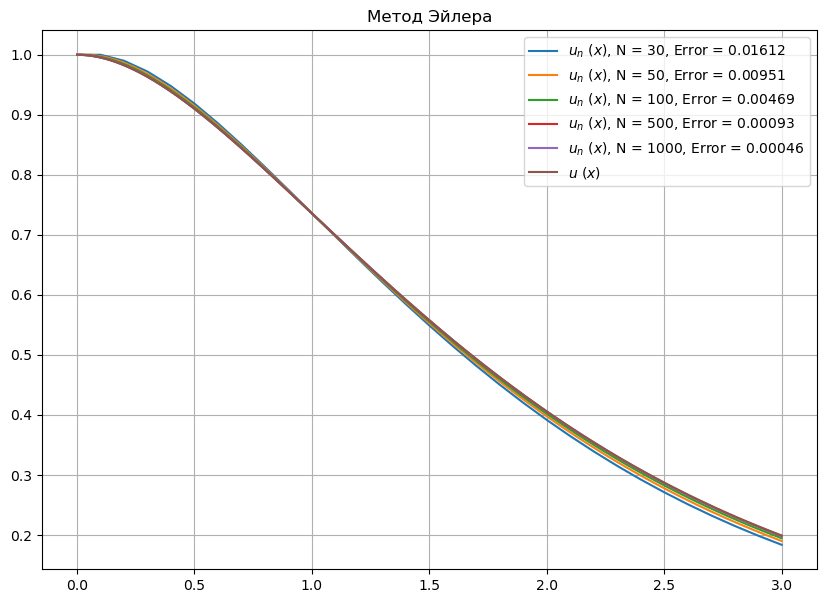

In [23]:
plt.figure(figsize = (10,7))

for N in N_:
    h = (b-a)/N
    t = np.zeros(N+1)
    
    for i in range(0,N+1):
        t[i] = h*i
    
    x = np.zeros(N+1)
    v = np.zeros(N+1)
    x_real = np.zeros(N+1)
    E = np.zeros(N+1)
    x[0] = 1
    v[0] = 0
    x_real[0] = x_(0)
    
    for n in range(0,N):
        v[n+1] = v[n] +  h * f(x[n],v[n])
        x[n+1] = x[n] + h * v[n]
        x_real[n+1] = x_(t[n+1])
        E[n+1] = abs(x_real[n+1] - x[n+1])
    print('N = ', str(N), ': Error = ', str(round(max(E),5)))
    plt.plot(t,x,label='$u_n$ $(x)$'+', N = '+str(N)+', Error = '+str(round(max(E),5)))
    
plt.plot(t,x_real,label='$u$ $(x)$')
plt.legend()
plt.title('Метод Эйлера')
plt.grid()
plt.savefig('5')

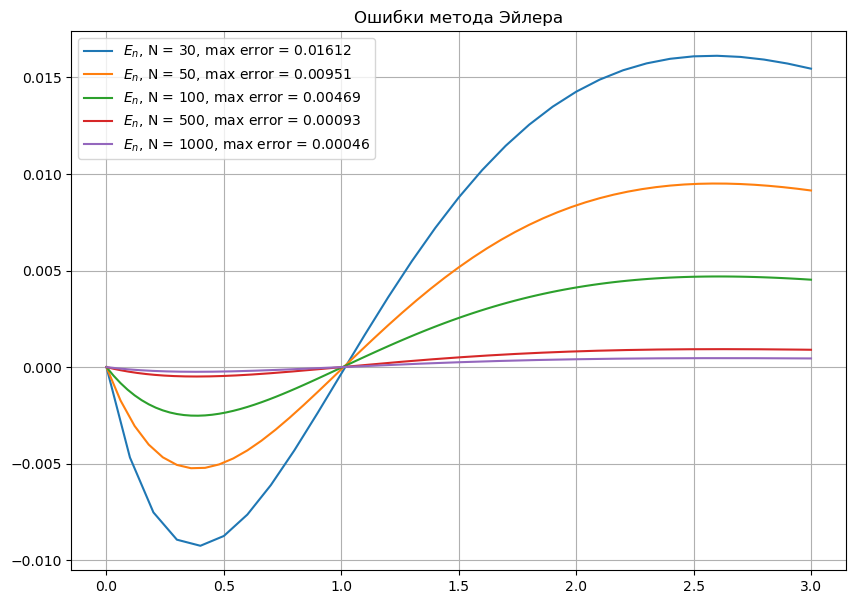

In [24]:
# График ошибок
plt.figure(figsize = (10,7))
for N in N_:
    h = (b-a)/N
    t = np.zeros(N+1)
    
    for i in range(0,N+1):
        t[i] = h*i
    
    x = np.zeros(N+1)
    v = np.zeros(N+1)
    x_real = np.zeros(N+1)
    E = np.zeros(N+1)
    x[0] = 1
    v[0] = 0
    x_real[0] = x_(0)
    
    for n in range(0,N):
        v[n+1] = v[n] +  h * f(x[n],v[n])
        x[n+1] = x[n] + h * v[n]
        x_real[n+1] = x_(t[n+1])
        E[n+1] = x_real[n+1] - x[n+1]
    plt.plot(t,E,label='$E_n$'+', N = '+str(N)+', max error = '+str(round(max(E),5)))
    
plt.legend()
plt.title('Ошибки метода Эйлера')
plt.grid()
plt.savefig('8')

### Метод Эйлера-Кромера

N =  30 : Error =  0.03168
N =  50 : Error =  0.01886
N =  100 : Error =  0.00938
N =  500 : Error =  0.00187
N =  1000 : Error =  0.00093


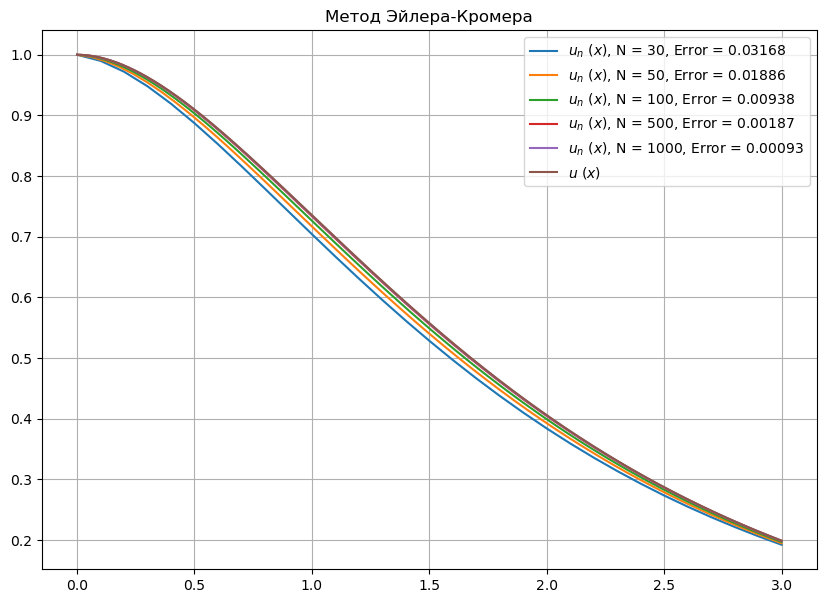

In [25]:
plt.figure(figsize = (10,7))

for N in N_:
    h = (b-a)/N
    t = np.zeros(N+1)
    
    for i in range(0,N+1):
        t[i] = h*i
    
    x = np.zeros(N+1)
    v = np.zeros(N+1)
    x_real = np.zeros(N+1)
    E = np.zeros(N+1)
    x[0] = 1
    v[0] = 0
    x_real[0] = x_(0)
    
    for n in range(0,N):
        v[n+1] = v[n] +  h * f(x[n],v[n])
        x[n+1] = x[n] + h * v[n+1]
        x_real[n+1] = x_(t[n+1])
        E[n+1] = x_real[n+1] - x[n+1]
    print('N = ', str(N), ': Error = ', str(round(max(abs(E)),5)))
    plt.plot(t,x,label='$u_n$ $(x)$'+', N = '+str(N)+', Error = '+str(round(max(E),5)))
    
plt.plot(t,x_real,label='$u$ $(x)$')
plt.legend()
plt.title('Метод Эйлера-Кромера')
plt.grid()
plt.savefig('6')

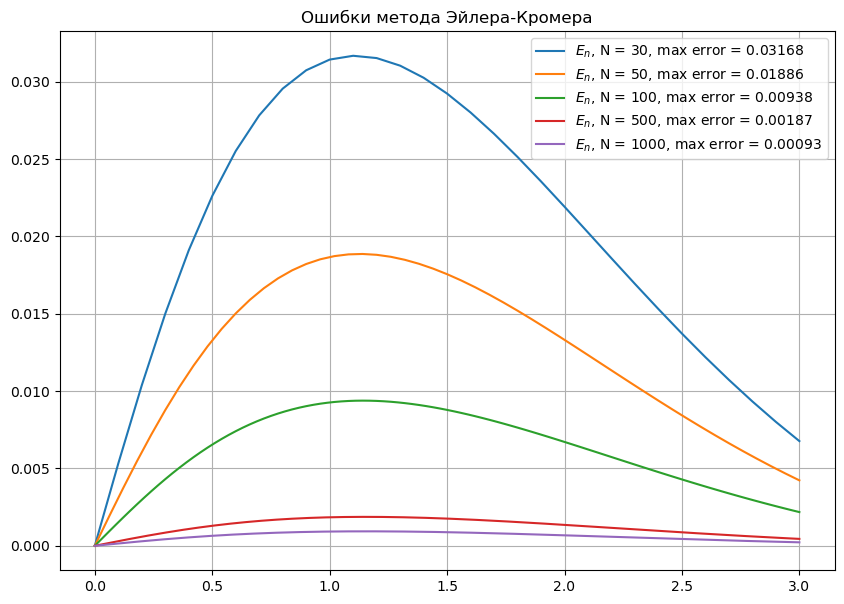

In [26]:
# График ошибок
plt.figure(figsize = (10,7))
for N in N_:
    h = (b-a)/N
    t = np.zeros(N+1)
    
    for i in range(0,N+1):
        t[i] = h*i
    
    x = np.zeros(N+1)
    v = np.zeros(N+1)
    x_real = np.zeros(N+1)
    E = np.zeros(N+1)
    x[0] = 1
    v[0] = 0
    x_real[0] = x_(0)
    
    for n in range(0,N):
        v[n+1] = v[n] +  h * f(x[n],v[n])
        x[n+1] = x[n] + h * v[n+1]
        x_real[n+1] = x_(t[n+1])
        E[n+1] = x_real[n+1] - x[n+1]
    plt.plot(t,E,label='$E_n$'+', N = '+str(N)+', max error = '+str(round(max(E),5)))
    
plt.legend()
plt.title('Ошибки метода Эйлера-Кромера')
plt.grid()
plt.savefig('9')

### Метод Рунге-Кутта

N =  30 : Error =  1.069174424e-06
N =  50 : Error =  1.32756588e-07
N =  100 : Error =  8.030212e-09
N =  500 : Error =  1.2519e-11
N =  1000 : Error =  7.81e-13


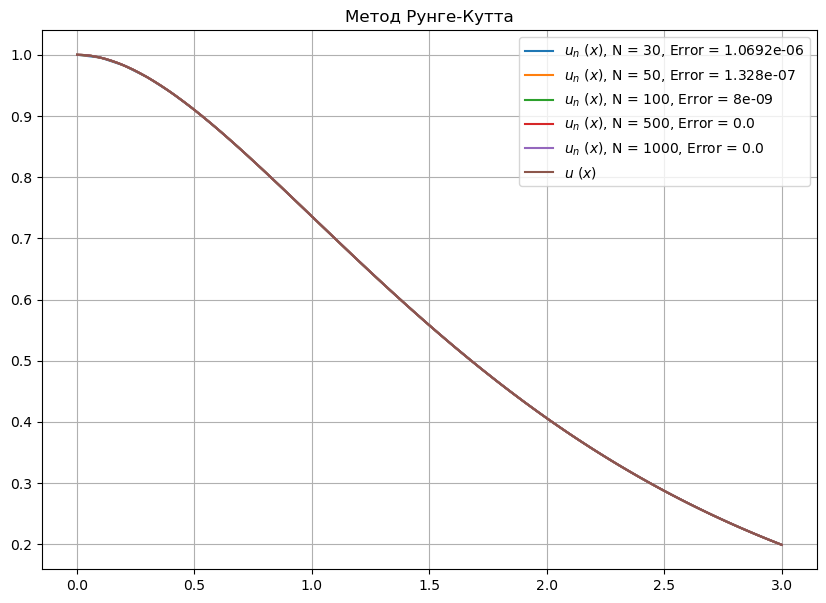

In [27]:
plt.figure(figsize = (10,7))

for N in N_:
    h = (b-a)/N
    t = np.zeros(N+1)
    
    for i in range(0,N+1):
        t[i] = h*i
    
    x = np.zeros(N+1)
    v = np.zeros(N+1)
    x_real = np.zeros(N+1)
    E = np.zeros(N+1)
    x[0] = 1
    v[0] = 0
    x_real[0] = x_(0)
    
    for n in range(0,N):
        
        k0 = f(x[n],v[n])
        l0 = g(v[n])
        k1 = f(x[n] + 0.5*h*l0, v[n] + 0.5*h*k0)
        l1 = g(v[n] + 0.5*h*k0)
        k2 = f(x[n] + 0.5*h*l1, v[n] + 0.5*h*k1)
        l2 = g(v[n] + 0.5*h*k1)
        k3 = f(x[n] + h*l2, v[n] + h*k2)
        l3 = g(v[n] + h*k2)
        
        v[n+1] = v[n] +  h/6 * (k0 + 2*k1 + 2*k2 + k3)
        x[n+1] = x[n] + h/6 * (l0 + 2*l1 + 2*l2 + l3)
        
        x_real[n+1] = x_(t[n+1])
        E[n+1] = x_real[n+1] - x[n+1]
    print('N = ', str(N), ': Error = ', str(round(max(abs(E)),15)))
    plt.plot(t,x,label='$u_n$ $(x)$'+', N = '+str(N)+', Error = '+str(round(max(E),10)))
    
plt.plot(t,x_real,label='$u$ $(x)$')
plt.legend()
plt.title('Метод Рунге-Кутта')
plt.grid()
plt.savefig('7')

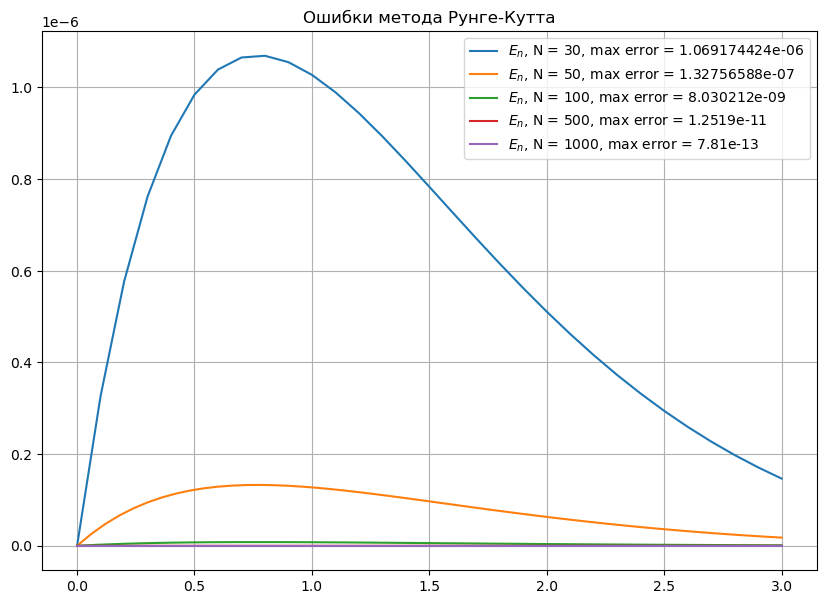

In [28]:
# График ошибок
plt.figure(figsize = (10,7))

for N in N_:
    h = (b-a)/N
    t = np.zeros(N+1)
    
    for i in range(0,N+1):
        t[i] = h*i
    
    x = np.zeros(N+1)
    v = np.zeros(N+1)
    x_real = np.zeros(N+1)
    E = np.zeros(N+1)
    x[0] = 1
    v[0] = 0
    x_real[0] = x_(0)
    
    for n in range(0,N):
        
        k0 = f(x[n],v[n])
        l0 = g(v[n])
        k1 = f(x[n] + 0.5*h*l0, v[n] + 0.5*h*k0)
        l1 = g(v[n] + 0.5*h*k0)
        k2 = f(x[n] + 0.5*h*l1, v[n] + 0.5*h*k1)
        l2 = g(v[n] + 0.5*h*k1)
        k3 = f(x[n] + h*l2, v[n] + h*k2)
        l3 = g(v[n] + h*k2)
        
        v[n+1] = v[n] +  h/6 * (k0 + 2*k1 + 2*k2 + k3)
        x[n+1] = x[n] + h/6 * (l0 + 2*l1 + 2*l2 + l3)
        
        x_real[n+1] = x_(t[n+1])
        E[n+1] = x_real[n+1] - x[n+1]
    plt.plot(t,E,label='$E_n$'+', N = '+str(N)+', max error = '+str(round(max(E),15)))

plt.legend()
plt.title('Ошибки метода Рунге-Кутта')
plt.grid()
plt.savefig('10')

# Выводы